False

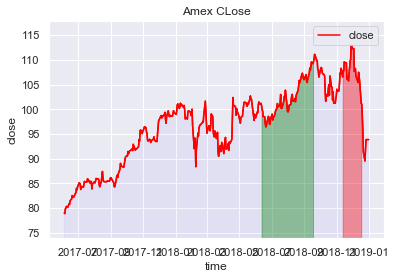

In [38]:

"""
Requirement 1:
Assuming we're back testing a quant strategy. One trade was:
Buy Amex 2017-06-13
Sell Amex 2018-12-19
We need to show the cose price for the above holding area
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from abupy import ABuSymbolPd

amex_df = pd.read_csv('../chapter4/gen/amex_df.csv',
                           parse_dates=True,
                           index_col=0)

def plot_demo(axs=None, just_series=False):
    """
    Draw Amex stock
    :param axs: axs are subplots
    :param just_series: Draw only series for close price
    :return: 
    """
    # If axes is passed in, use it
    drawer = plt if axs is None else axs
    
    # Series close price, red
    drawer.plot(amex_df.close, c='red')
    
    if not just_series:
        drawer.plot(amex_df.close.index,
                    amex_df.close.values + 10,
                    c='g')
        
        drawer.plot(amex_df.close.index.tolist(),
                    amex_df.close.values + 20,
                    c='b')
    
    plt.xlabel('time')
    plt.ylabel('close')
    plt.title('Amex CLose')
    plt.grid(True)
    
def plot_trade(buy_date, sell_date):
    # Find out the index for buy_date 
    start_date = amex_df[amex_df.index == buy_date].key.values[0]
    
    # Find out the index for sell_date
    end_date = amex_df[amex_df.index == sell_date].key.values[0]
    
    # Using 5.1.1 plot_demo()
    # just_series=True, we only need to drop the closing price
    plot_demo(just_series=True)
    # Paint a blue background color
    plt.fill_between(amex_df.index,
                     0,
                     amex_df['close'],
                     color='blue',
                     alpha=.02)
    # Mark red for up and green for down, slicing using start and end
    if amex_df['close'][end_date] < amex_df['close'][start_date]:
      plt.fill_between(amex_df.index[start_date:end_date], 0,
                      amex_df['close'][start_date:end_date], color='red',
                      alpha=.38)
      is_win = False
    else:
      plt.fill_between(amex_df.index[start_date:end_date], 0,
                      amex_df['close'][start_date:end_date], color='green',
                      alpha=.38)
      is_win = True

    # Configure y axis to show range
    plt.ylim(np.min(amex_df['close']) - 5,
             np.max(amex_df['close']) + 5)
    # Use loc='best'
    plt.legend(['close'],
               loc='best')
    return is_win

# Mark Trade
plot_trade('2018-06-13',
           '2018-09-19')
plot_trade('2018-11-13',
           '2018-12-19')

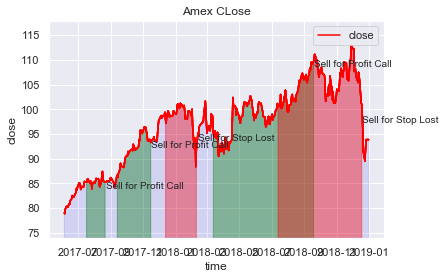

In [44]:
def plot_trade_with_annotate(buy_date, sell_date):
    """
    :param buy_date: 
    :param sell_date: 
    :param annotate: 
    :return: 
    """
    # Mark Trade
    is_win = plot_trade(buy_date, sell_date)
    # Annotate
    plt.annotate('Sell for Profit Call' if is_win else 'Sell for Stop Lost',
                 xy=(sell_date, amex_df['close'].asof(sell_date)),
                 arrowprops=dict(facecolor='yellow'),
                 horizontalalignment='left',
                 verticalalignment='top')
    
plot_trade_with_annotate('2017-07-17',
                         '2017-08-22')
plot_trade_with_annotate('2017-09-13',
                         '2017-11-16')
plot_trade_with_annotate('2017-12-13',
                         '2018-02-12')
plot_trade_with_annotate('2018-03-13',
                         '2018-09-19')
plot_trade_with_annotate('2018-07-13',
                         '2018-12-19')
